# Josh G. Work

# Importing Libraries and Creating a Recent Dataframe

In [1]:
# Import libraries and read data into dataframe
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_parquet('../zippedData/merged_data.parquet')

# Create dataframe filtered by last 10 years of data
recent = df.loc[df.release_date.dt.year >= 2010]

## Exploring Genre vs. ROI

In [2]:
# Create dataframe expanded along genres using pd.explode
expanded_genres = recent.explode('genres')

### Genre vs. Mean ROI

In [3]:
# Create dataframe grouped by genres with mean ROI, mean product budget, and a count of titles in the genre
groupby_genres_mean = expanded_genres.groupby('genres').agg({'ROI': 'mean', 'prod_budget': 'mean', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_mean.title = groupby_genres_mean.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_mean = groupby_genres_mean.loc[groupby_genres_mean.title >= 75]

# Create a dataframe that represents the top 6 genres by mean ROI
top_6_by_mean = groupby_genres_mean.nlargest(6, 'ROI')

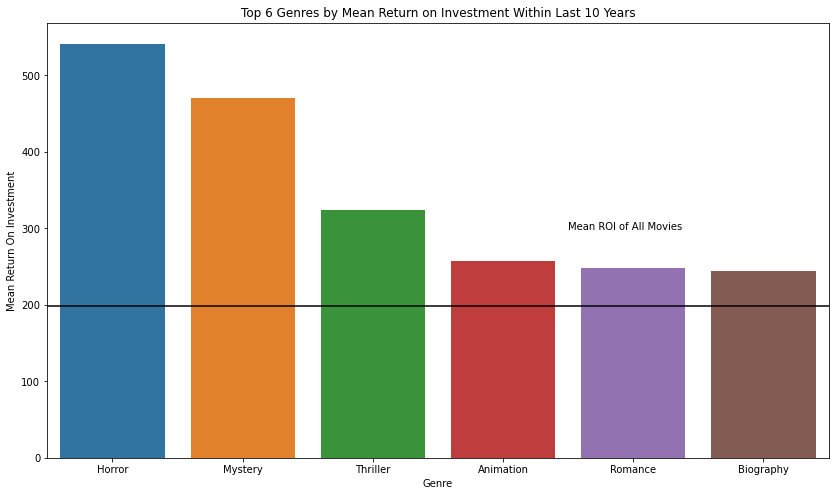

In [4]:
# Create a bar plot representing the top 6 genres by mean ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_mean, x=top_6_by_mean.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 6 Genres by Mean Return on Investment Within Last 10 Years')

# Create a horizontal line representing the mean ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.mean(), c='k')
ax.annotate('Mean ROI of All Movies',(3.5, float(recent.ROI.mean()) + 100));

### Genre vs. Median ROI

In [5]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_median = groupby_genres_median.loc[groupby_genres_median.title >= 75]

# Create a dataframe that represents the top 6 genres by median ROI
top_6_by_median = groupby_genres_median.nlargest(6, 'ROI')

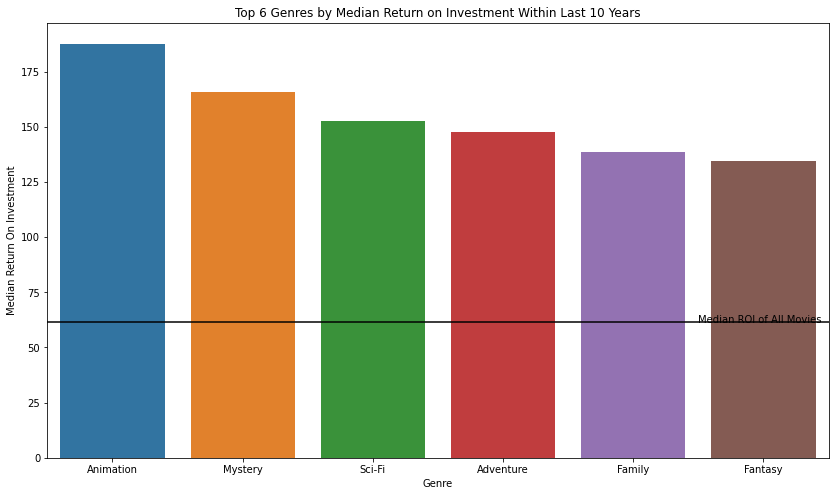

In [6]:
# Create a bar plot representing the top 6 genres by median ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_median, x=top_6_by_median.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 6 Genres by Median Return on Investment Within Last 10 Years')

# Create a horizontal line representing the median ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.median(), c='k')
ax.annotate('Median ROI of All Movies',(4.5, recent.ROI.median()));

### Distribution of ROIs by Genre

In [7]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [8]:
# Declare a set of genres to evaluate (selected from the combined list of top 6 by median and top 6 by mean)
genres_to_evaluate = set(list(top_6_by_mean.index))
for item in list(top_6_by_median.index):
    genres_to_evaluate.add(item)
genres_to_evaluate = list(genres_to_evaluate)

# Create dataframes representing the top 9 genres and the 6 genres by median (less influenced by outliers)
top_9_genres_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(genres_to_evaluate)]
top_6_genres_by_median_raw_ROI = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres.isin(list(top_6_by_median.index))]

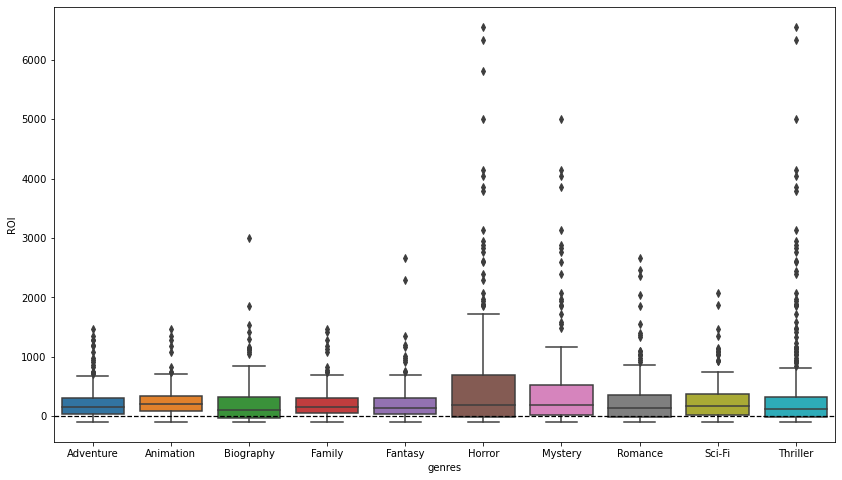

In [9]:
# Create boxplots for each of the top 9 genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn boxplot
sns.boxplot(data=top_9_genres_raw_ROI, x='genres', y='ROI', ax=ax)

# Create a horizontal line at ROI = 0 for clarity
ax.axhline(y=0, linestyle='--', linewidth=1.25, c='k');

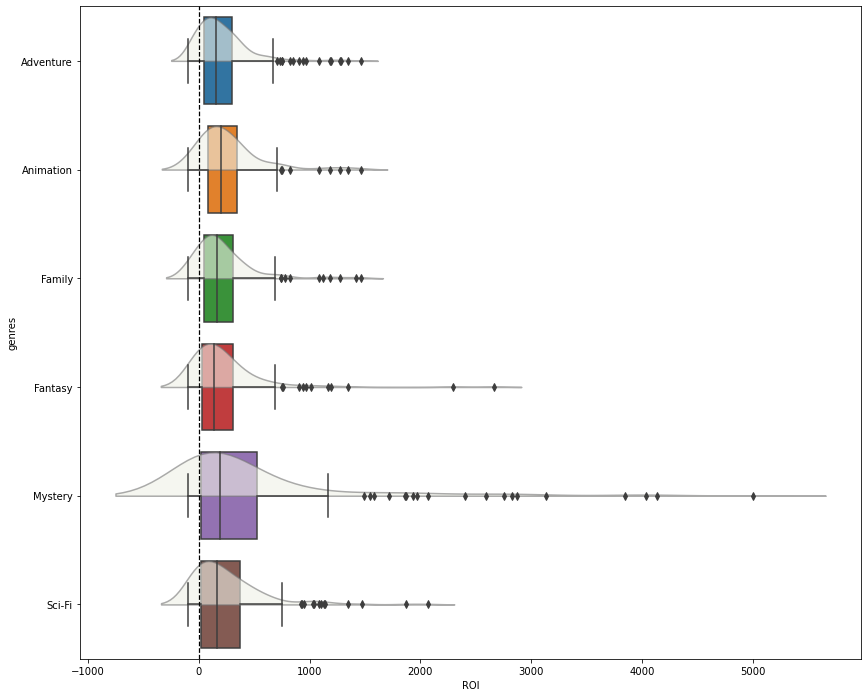

In [10]:
# Create an overlaid boxplot and violinplot for the top 6 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,12))

# Create seaborn boxplot
sns.boxplot(data=top_6_genres_by_median_raw_ROI, y='genres', x='ROI', orient='h', ax=ax)

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data=top_6_genres_by_median_raw_ROI,
               orient='h',
               y='genres',
               x='ROI',
               inner='box',
               hue=True,
               hue_order = [True,False],
               split=True,
               color='#e7f294',
               ax=ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha=0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x=0, c='k', linestyle='--', linewidth=1.25);


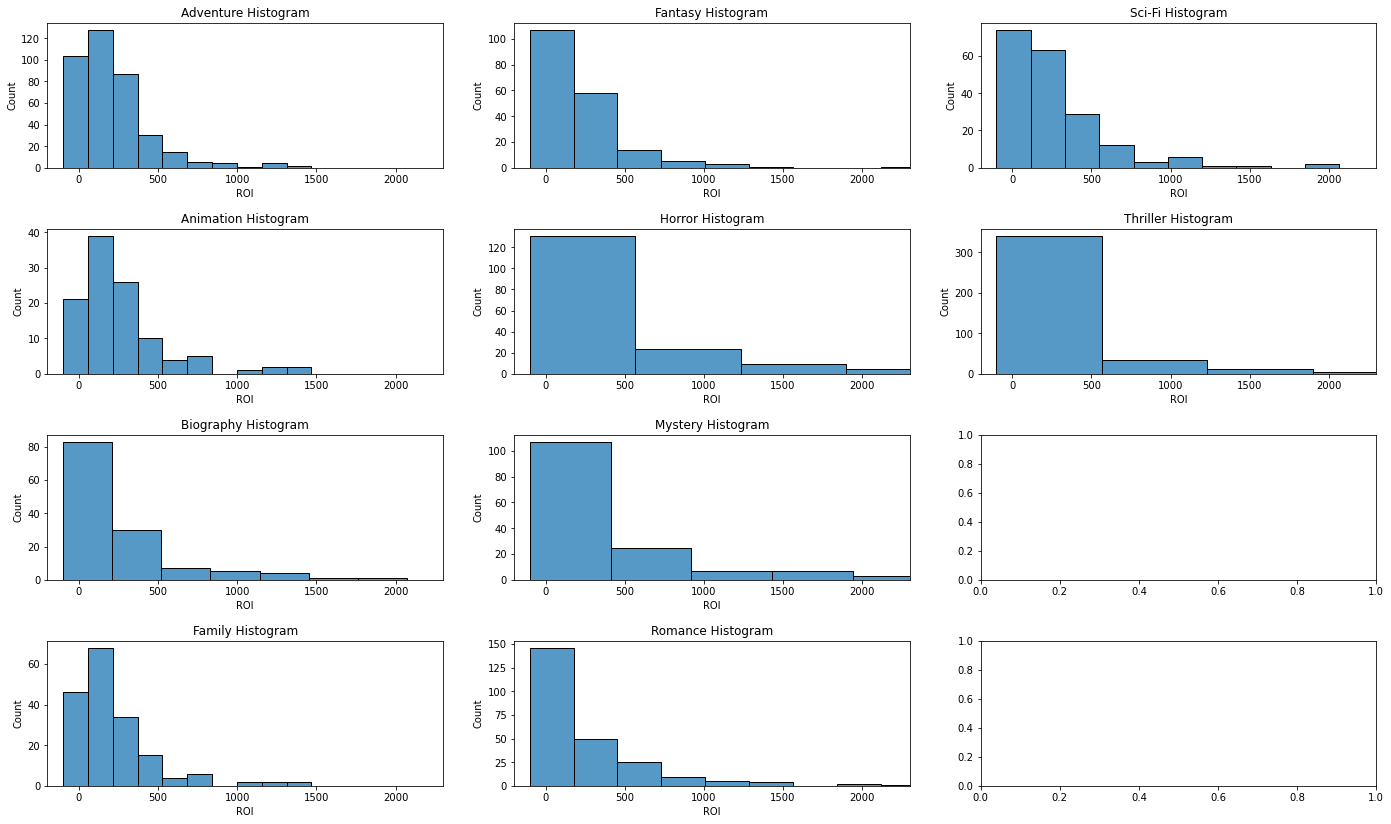

In [11]:
# Create a set of histograms for each of the top 9 genres in one figure
# Declare fig, ax objects, use 4 by 3 shape to accomodate 9 plots
fig, ax = plt.subplots(4,3, figsize=(20,12))

# Set tight layout with padding so labels do not overlap
plt.tight_layout(pad = 4.0)

# For each genre, create a seaborn histplot with 10 bins and correct title labels
for index, genre in enumerate(list(top_9_genres_raw_ROI.genres.unique())):
    axis = ax[index % 4][index // 4]
    sns.histplot(data = top_9_genres_raw_ROI,
                 x = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_xlim([-200, 2300])
    axis.set_title('{} Histogram'.format(genre));

# Show plot
plt.show()

## Exploring Runtime vs. ROI

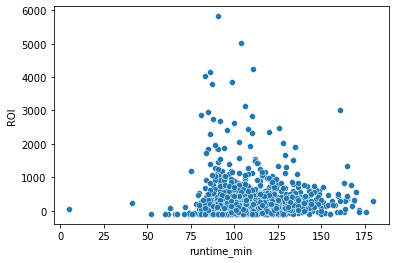

In [12]:
# Create seaborn scatterplot of runtime_min vs. ROI
# Not much semblance of correlation - if you are between ~90 and ~135 minutes (which is almost every movie), you make money
# Runtimes are all pretty close, the spread is not significant enough to try to separate into categorical "bins"
sns.scatterplot(data=recent, x='runtime_min', y='ROI');

## Exploring Yearly Change in Median ROI by Genre

In [13]:
# Investigation into yearly change in median ROI year over year
# Copy base dataframe
yearly_diff_df = df.copy()

# Create new year column based off of year attribute of release_date column
yearly_diff_df['year'] = yearly_diff_df.release_date.dt.year

# Explode along genres for aggregation purposes
yearly_diff_df = yearly_diff_df.explode('genres')

# Group by year, then genres, aggregate ROI according to median and title according to count
# Reset index to bring year and genres back out as rows
yearly_diff_df = yearly_diff_df.groupby(['year','genres']).agg({'ROI': 'median', 'title': 'count'}).reset_index()

# Remove all places where genre == 'None' by slicing
yearly_diff_df = yearly_diff_df.loc[yearly_diff_df.genres != 'None']

# Sort values by genre then year to order rows for diff function
yearly_diff_df = yearly_diff_df.sort_values(['genres', 'year'])

# Create new column representing yearly difference in median ROI using diff function
yearly_diff_df['yearly_diff'] = yearly_diff_df.ROI.diff()

# Slice to only include years 2014-present
yearly_diff_df = yearly_diff_df.loc[yearly_diff_df.year > 2013]

In [1]:
# Create bar plots of yearly change in median ROI for top genres
# Slice yearly_diff_df where genres are in the top 6 by median
yearly_change_top_by_median = yearly_diff_df.loc[yearly_diff_df.genres.isin(list(top_6_by_median.index))]

# Create fig, ax objects, 2 by 3 grid
fig, ax = plt.subplots(3, 3, figsize = (14,8))

# Declare tight layout and padding to prevent overlap
plt.tight_layout(pad = 4.0)

# Set color palette
sns.set_palette('tab10')

# For each year, create a seaborn barplot with the percentage change in median ROI for each genre
for index, year in enumerate(list(yearly_change_top_by_median.year.unique())):
    # Select axis
    axis = ax[index % 3][index // 3]
    
    # Create seaborn barplot
    sns.barplot(data = yearly_change_top_by_median.loc[yearly_change_top_by_median.year == year],
                x = 'year',
                y = 'yearly_diff',
                hue = 'genres',
                ax = axis)
    
    # Set labels and title
    axis.set_xlabel('Year')
    axis.set_ylabel('Change in Median ROI')
    axis.set_title('Change in Median ROI by Genre for {}'.format(year))
    
    # Remove local legend
    axis.get_legend().remove();

# For each of the rightmost 3 axes, turn off all elements
for n in range(3):
    ax[n][2].axis('off')

# Get labels from first graph (which one is irrelevant since they all share the same legend)
lines_labels = [ax[0][0].get_legend_handles_labels()]

# Create lines and labels from above
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Create unified legend
fig.legend(lines, labels, bbox_to_anchor = [0.75,0.5], loc='center', fontsize='xx-large');

NameError: name 'yearly_diff_df' is not defined

# Jocel's Work

In [ ]:
test = df.explode('genres')
test
# movie_info_df["genres"] = movie_info_df["genres"].str.split(pat = "|")
# movie_info_df = movie_info_df.explode("genres")
# movie_info_df

#test["ROI"].median()

In [ ]:
grouped_median_by_genre = test.groupby(["genres"]).median().sort_values("ROI", ascending = False).reset_index()
grouped_median_by_genre

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_genre["genres"], y = grouped_median_by_genre["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [ ]:
test1 = df.explode("director")
test1

In [ ]:
grouped_median_by_director = test1.groupby(["director"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_median_by_director

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_director["director"], y = grouped_median_by_director["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [ ]:
test2 = df.explode("writer")
test2

In [ ]:
grouped_median_by_writer = test2.groupby(["writer"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_median_by_writer

In [ ]:
fig = plt.figure(figsize = (10, 8))
ax = sns.barplot(x = grouped_median_by_writer["writer"], y = grouped_median_by_writer["ROI"], estimator = np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show();

In [ ]:
filtered_df_by_date = df.loc[df.release_date.dt.year >= 2012]
filtered_df_by_date

In [ ]:
test_filtered_date = filtered_df_by_date.explode("genres")
test_filtered_date

In [ ]:
grouped_by_genre_filtered = test_filtered_date.groupby(["genres"]).median().sort_values("ROI", ascending = False).reset_index()
grouped_by_genre_filtered

In [ ]:
fig = px.bar(grouped_by_genre_filtered, x = "genres", y = "ROI", color_discrete_sequence = ["DarkBlue"])
fig.show();

In [ ]:
test1_filtered_date = filtered_df_by_date.explode("director")
test1_filtered_date

In [ ]:
grouped_by_director_filtered = test1_filtered_date.groupby(["director"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_by_director_filtered

In [ ]:
fig = px.bar(grouped_by_director_filtered, x = "director", y = "ROI", color_discrete_sequence = ["DarkBlue"])
fig.show();

In [ ]:
test2_filtered_date = filtered_df_by_date.explode("writer")
test2_filtered_date

In [ ]:
grouped_by_writer_filtered = test2_filtered_date.groupby(["writer"]).median().sort_values("ROI", ascending = False).reset_index().head(25)
grouped_by_writer_filtered

In [ ]:
fig = px.bar(grouped_by_writer_filtered, x = "writer", y = "ROI", color_discrete_sequence = ["DarkBlue"])
fig.show();

In [ ]:
# both genres and writers columns are exploded

test_filtered_date = test_filtered_date.explode("writer")
test_filtered_date

In [ ]:
animation = test_filtered_date.loc[test_filtered_date["genres"] == "Animation"]
animation["ROI_Diff"] = (animation["ROI"] - animation["ROI"].mean()) / animation["ROI"].mean()
animation.head()

In [ ]:
animation_df = animation.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head(5)
animation_top = animation_df["ROI_Diff"]
animation_top = animation_top.to_frame()
animation_top["genre"] = ["Animation", "Animation", "Animation", "Animation", "Animation"]
animation_top.head()

In [ ]:
mystery = test_filtered_date.loc[test_filtered_date["genres"] == "Mystery"]
mystery["ROI_Diff"] = (mystery["ROI"] - mystery["ROI"].mean()) / mystery["ROI"].mean()
mystery.head()

In [ ]:
mystery_df = mystery.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head(5)
mystery_top = mystery_df["ROI_Diff"]
mystery_top = mystery_top.to_frame()
mystery_top["genre"] = ["Mystery", "Mystery", "Mystery", "Mystery", "Mystery"]
mystery_top.head()

In [ ]:
horror = test_filtered_date.loc[test_filtered_date["genres"] == "Horror"]
horror["ROI_Diff"] = (horror["ROI"] - horror["ROI"].mean()) / horror["ROI"].mean()
horror.head()

In [ ]:
horror_df = horror.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
horror_top = horror_df["ROI_Diff"]
horror_top = horror_top.to_frame()
horror_top["genre"] = ["Horror", "Horror", "Horror", "Horror", "Horror"]
horror_top.head()

In [ ]:
fantasy = test_filtered_date.loc[test_filtered_date["genres"] == "Fantasy"]
fantasy["ROI_Diff"] = (fantasy["ROI"] - fantasy["ROI"].mean()) / fantasy["ROI"].mean()
fantasy.head()

In [ ]:
fantasy_df = fantasy.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
fantasy_top = fantasy_df["ROI_Diff"]
fantasy_top = fantasy_top.to_frame()
fantasy_top["genre"] = ["Fantasy", "Fantasy", "Fantasy", "Fantasy", "Fantasy"]
fantasy_top.head()

In [ ]:
family = test_filtered_date.loc[test_filtered_date["genres"] == "Family"]
family["ROI_Diff"] = (family["ROI"] - family["ROI"].mean()) / family["ROI"].mean()
family.head()

In [ ]:
family_df = family.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
family_top = family_df["ROI_Diff"]
family_top = family_top.to_frame()
family_top["genre"] = ["Family", "Family", "Family", "Family", "Family"]
family_top.head()

In [ ]:
adventure = test_filtered_date.loc[test_filtered_date["genres"] == "Adventure"]
adventure["ROI_Diff"] = (adventure["ROI"] - adventure["ROI"].mean()) / adventure["ROI"].mean()
adventure.head()

In [ ]:
adventure_df = adventure.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
adventure_top = adventure_df["ROI_Diff"]
adventure_top = adventure_top.to_frame()
adventure_top["genre"] = ["Adventure", "Adventure", "Adventure", "Adventure", "Adventure"]
adventure_top.head()

In [ ]:
sci_fi = test_filtered_date.loc[test_filtered_date["genres"] == "Sci-Fi"]
sci_fi["ROI_Diff"] = (sci_fi["ROI"] - sci_fi["ROI"].mean()) / sci_fi["ROI"].mean()
sci_fi.head()

In [ ]:
sci_fi_df = sci_fi.groupby(["writer"]).mean().sort_values("ROI_Diff", ascending = False).head()
sci_fi_top = sci_fi_df["ROI_Diff"]
sci_fi_top = sci_fi_top.to_frame()
sci_fi_top["genre"] = ["Sci-Fi", "Sci-Fi", "Sci-Fi", "Sci-Fi", "Sci-Fi"]
sci_fi_top.head()

In [ ]:
concat_genre_df = pd.concat([animation_top, mystery_top, horror_top, fantasy_top, family_top, adventure_top, sci_fi_top], axis = 0)
sorted_genre_df= concat_genre_df.sort_values("ROI_Diff", ascending = False).reset_index().head(15)
sorted_genre_df

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.color_palette("flare", as_cmap = True)
ax = sns.barplot(data = sorted_genre_df, x = "writer", y = "ROI_Diff", hue = "genre")
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90, ha="right")
plt.tight_layout
plt.show();

# Josh P. Work

In [ ]:
df = pd.read_parquet('../zippedData/merged_data.parquet')

In [ ]:
df['year'] = df['release_date'].dt.year

In [ ]:
genre = df.loc[df['year']>= 2012]

In [ ]:
genre_all = df.explode('genres')

In [ ]:
genre = genre.explode('genres')

In [ ]:
genre.groupby('genres').median().sort_values('ROI', ascending = False)

In [ ]:
new_genre = genre_all[genre_all.genres.isin(['Sci-Fi', 'Mystery', 'Horror', 'Thriller','Romance', 'Animation'])]
new_genre

In [ ]:
new_genre.groupby(['year','genres']).median().reset_index()

In [ ]:
graph_new_genre = new_genre.groupby(['year','genres']).median()
graph_new_genre.reset_index(inplace = True)

In [ ]:
graph_new_genre

In [ ]:
ROI_by_year = genre_all.groupby('year').ROI.median()

In [ ]:
ROI_by_year.values

In [ ]:
import plotly.graph_objects as go
# fig = go.Figure()
# fig.add_trace(go.scatter(x = graph_new_genre['year'], y = graph_new_genre['ROI']))
# fig.show()

In [ ]:
fig = go.Figure()
fig = pe.line(graph_new_genre, x = 'year', y = 'ROI', color = 'genres')
fig.update_xaxes(dtick=1, range=[2009, 2020])
fig.update_yaxes(range=[-50, 560])
fig.add_trace(pe.line(x = graph_new_genre['year'], y = graph_new_genre['ROI'], color = graph_new_genre['genres']).data[0])
fig.show()

In [ ]:
graph_new_genre.genres.value_counts()

In [ ]:
animation_year = graph_new_genre[graph_new_genre.genres == 'Animation']

In [ ]:
romance_year = graph_new_genre[graph_new_genre.genres == 'Romance']

In [ ]:
horror_year = graph_new_genre[graph_new_genre.genres == 'Horror']

In [ ]:
mystery_year = graph_new_genre[graph_new_genre.genres == 'Mystery']

In [ ]:
scifi_year = graph_new_genre[graph_new_genre.genres == 'Sci-Fi']

In [ ]:
thriller_year = graph_new_genre[graph_new_genre.genres == 'Thriller']

In [ ]:
fig, ax = plt.subplots(3,2,figsize = (16,12))
plt.tight_layout(pad = 5.0)
for index, genre in enumerate(list(graph_new_genre.genres.unique())):
    axis = ax[index % 3][index // 3]
    sns.lineplot(x = ROI_by_year.index, y = ROI_by_year.values, color = 'black', linestyle = '--', ax = axis)
    sns.lineplot(data = graph_new_genre,
                 x = 'year', y = graph_new_genre.loc[graph_new_genre.genres == genre].ROI,
                 ax = axis)
    axis.set_xlim([2011,2020])
    axis.set_ylim([-50,550])
    axis.set_xlabel('Year')
    axis.set_title(f'ROI by {genre}')
    axis.xaxis.set_major_locator(plt.MultipleLocator(1))
    for tick in axis.get_xticklabels():
        tick.set_rotation(45)

plt.show()

# sns.lineplot(data = animation_year, x = 'year', y = 'ROI', ax = ax[0][0])
# sns.lineplot(x = ROI_by_year.index, y = ROI_by_year.values, color = 'black', linestyle = 'dashed', ax = ax[0][0])
# plt.xlim([2009,2020])
# plt.ylim([-50,550])
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
# plt.grid(visible = True)
# ax[0][0].set_facecolor('#E5E4E2')
# ax.set_title('ROI by Genre from 2009 - 2019')
# ax.set_xlabel('Year')
# plt.rcParams.update({'font.size': 14})

# plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (14,10))
sns.lineplot(data = graph_new_genre, x = 'year', y = 'ROI', hue = 'genres' , palette=['blue','#BF40BF','red','#6E260E','green', 'yellow'])
sns.lineplot(x = ROI_by_year.index, y = ROI_by_year.values, color = 'black', linestyle = 'dashed')
plt.xlim([2009,2020])
plt.ylim([-50,550])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid(visible = True)
ax.set_facecolor('#E5E4E2')
ax.set_title('ROI by Genre from 2009 - 2019')
ax.set_xlabel('Year')
plt.rcParams.update({'font.size': 14})

plt.show()

In [ ]:
director = genre.explode('director')
director

In [ ]:
#Explode Genre DF on Director to pull insights on Directors
genre_dir = genre.explode('director')

In [ ]:
#
animation = genre_dir.loc[genre_dir['genres']== 'Animation']
animation['ROI_diff'] = (animation['ROI'] - animation['ROI'].mean()) / animation['ROI'].mean() 
scifi = genre_dir.loc[genre_dir['genres']== 'Sci-Fi']
scifi['ROI_diff'] = (scifi['ROI'] - scifi['ROI'].mean()) / scifi['ROI'].mean() 
adventure = genre_dir.loc[genre_dir['genres']== 'Adventure']
adventure['ROI_diff'] = (adventure['ROI'] - adventure['ROI'].mean()) / adventure['ROI'].mean()
fantasy = genre_dir.loc[genre_dir['genres']== 'Fantasy']
fantasy['ROI_diff'] = (fantasy['ROI'] - fantasy['ROI'].mean()) / fantasy['ROI'].mean()
family = genre_dir.loc[genre_dir['genres']== 'Family']
family['ROI_diff'] = (family['ROI'] - family['ROI'].mean()) / family['ROI'].mean()
horror = genre_dir.loc[genre_dir['genres']== 'Horror']
horror['ROI_diff'] = (horror['ROI'] - horror['ROI'].mean()) / horror['ROI'].mean()
mystery = genre_dir.loc[genre_dir['genres']== 'Mystery']
mystery['ROI_diff'] = (mystery['ROI'] - mystery['ROI'].mean()) / mystery['ROI'].mean()

In [ ]:
animation

In [ ]:
#animation_count = animation.groupby('director').agg({'title': 'count', 'ROI': 'median'})
#animation_count.loc[animation_count.title == 1]

In [ ]:
genre.groupby('genres').median().sort_values('ROI', ascending = False)

In [ ]:
animation_dir = animation.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
a = animation_dir.ROI_diff
animation_top = a.to_frame()
animation_top['genre'] = ['Animation','Animation','Animation','Animation','Animation']
animation_top

In [ ]:
scifi_dir = scifi.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
scifi_top = scifi_dir.ROI_diff
scifi_top = scifi_top.to_frame()
scifi_top['genre'] = ['Sci-Fi','Sci-Fi','Sci-Fi','Sci-Fi','Sci-Fi']
scifi_top

In [ ]:
adventure_dir = adventure.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
adventure_top = adventure_dir.ROI_diff
adventure_top = adventure_top.to_frame()
adventure_top['genre'] = ['Adventure','Adventure','Adventure','Adventure','Adventure']
adventure_top

In [ ]:
fantasy_dir = fantasy.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
fantasy_top = fantasy_dir.ROI_diff
fantasy_top = fantasy_top.to_frame()
fantasy_top['genre'] = ['Fantasy','Fantasy','Fantasy','Fantasy','Fantasy']
fantasy_top

In [ ]:
family_dir = family.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
family_top = family_dir.ROI_diff
family_top = family_top.to_frame()
family_top['genre'] = ['Family','Family','Family','Family','Family']
family_top

In [ ]:
horror_dir = horror.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
horror_top = horror_dir.ROI_diff
horror_top = horror_top.to_frame()
horror_top['genre'] = ['Horror','Horror','Horror','Horror','Horror']
horror_top

In [ ]:
mystery_dir = mystery.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
mystery_top = mystery_dir.ROI_diff
mystery_top = mystery_top.to_frame()
mystery_top['genre'] = ['Mystery','Mystery','Mystery','Mystery','Mystery']
mystery_top

In [ ]:
frames = [adventure_top, animation_top, scifi_top, fantasy_top, family_top, horror_top, mystery_top]
top_all = pd.concat(frames)
top_15 = top_all.sort_values('ROI_diff', ascending = False).head(15)
top_15 = top_15.reset_index()
top_15

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data = top_15, x = 'director', y = 'ROI_diff', hue = 'genre')
plt.xticks(rotation=90)
plt.title('Top Directors of the Best Performing Genres')
plt.ylabel('ROI Standardization Factor');

In [ ]:
genre_dictionary = [{"id":28,"name":"Action"},
                              {"id":12,"name":"Adventure"},
                              {"id":16,"name":"Animation"},
                              {"id":35,"name":"Comedy"},
                              {"id":80,"name":"Crime"},
                              {"id":99,"name":"Documentary"},
                              {"id":18,"name":"Drama"},
                              {"id":10751,"name":"Family"},
                              {"id":14,"name":"Fantasy"},
                              {"id":36,"name":"History"},
                              {"id":27,"name":"Horror"},
                              {"id":10402,"name":"Music"},
                              {"id":9648,"name":"Mystery"},
                              {"id":10749,"name":"Romance"},
                              {"id":878,"name":"Science Fiction"},
                              {"id":10770,"name":"TV Movie"},
                              {"id":53,"name":"Thriller"},
                              {"id":10752,"name":"War"},
                              {"id":37,"name":"Western"}]

In [ ]:
# df.genres = df.genres.str.strip('\[\]').str.replace(" ", "").str.strip().str.split(',')
# df = df.explode('genres')
# df.genres = df.genres.replace(r'^\s*$', np.nan, regex=True)
# #df.genres.astype('float')
# def find_genre(key):
#     if key is np.nan:
#         return 'None'
#     for dictionary in genre_dictionary:
#         if dictionary['id'] == int(key):
#             return dictionary['name']
#     return 'None'
# df.genres = df.genres.apply(lambda x: find_genre(x))